In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [10]:
df=pd.read_csv("/content/salary_prediction_dataset.csv")

In [ ]:
df.head()

,YearsExperience,Salary
0,8.116262,41469.816295
1,19.063572,88641.137315
2,14.907885,76440.413727
3,12.374511,64925.484725
4,3.964354,22620.723082


In [11]:
df.describe()

,YearsExperience,Salary
count,1000.000000,1000.000000
mean,10.314875,52068.851655
std,5.550610,27966.621944
min,1.088008,-4035.877131
25%,5.483492,27207.865190
50%,10.439340,52863.110076
75%,15.142072,75216.792162
max,19.994636,107828.787113


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  1000 non-null   float64
 1   Salary           1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


YearsExperience    0
Salary             0
dtype: int64


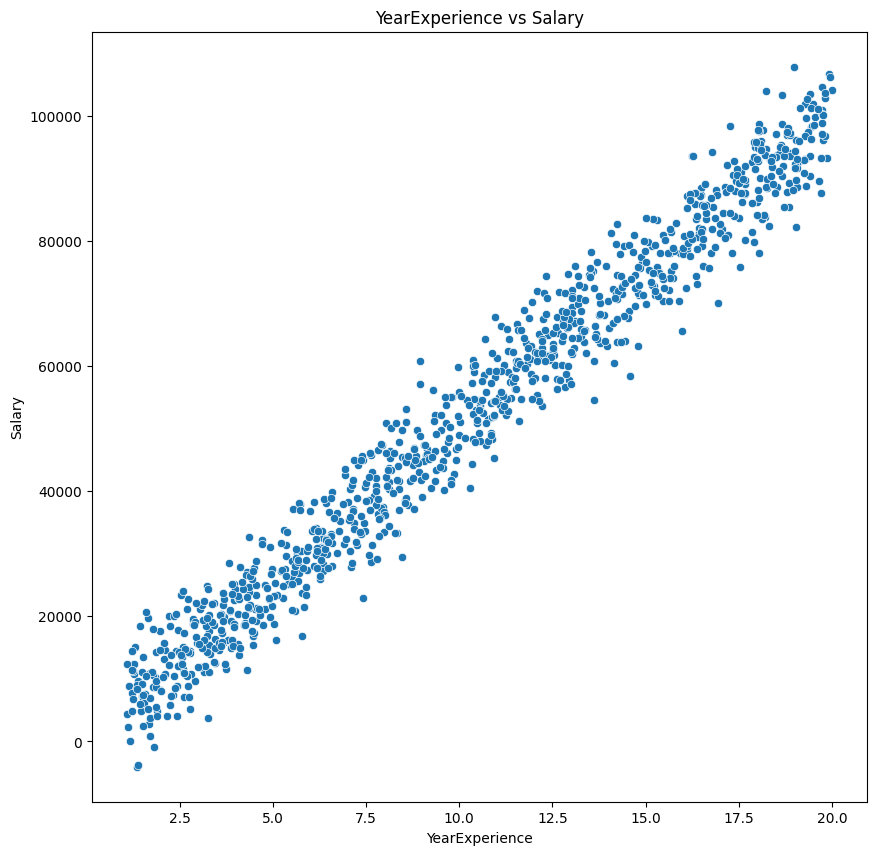

In [12]:
#checking for missing values

print(df.isnull().sum())
plt.figure(figsize=(10,10))
sns.scatterplot(x=df["YearsExperience"],y=df["Salary"])
plt.xlabel("YearExperience")
plt.ylabel("Salary")
plt.title("YearExperience vs Salary")
plt.show()

In [21]:
x=df[["YearsExperience"]] #independent varible
y=df[["Salary"]] #dependent variable
#splitting in tarining and testing
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape

((800, 1), (200, 1))

In [22]:
#creating and training the simple linear regression
model=LinearRegression()
model.fit(x_train,y_train)
print(f"intercept:{model.intercept_}")
print(f"coefficient:{model.coef_[0]}")

intercept:[995.57704648]
coefficient:[4953.70941726]


In [34]:
y_pred=model.predict(x_test)

result=pd.DataFrame({"Actual Salary":y_test["Salary"],"Predicted Salary":y_pred.flatten()})

result.head()

,Actual Salary,Predicted Salary
521,46144.843128,41798.916309
737,85731.005173,82808.016799
740,55059.748116,49496.929481
660,42143.595304,39465.280850
411,88585.759395,95369.573814


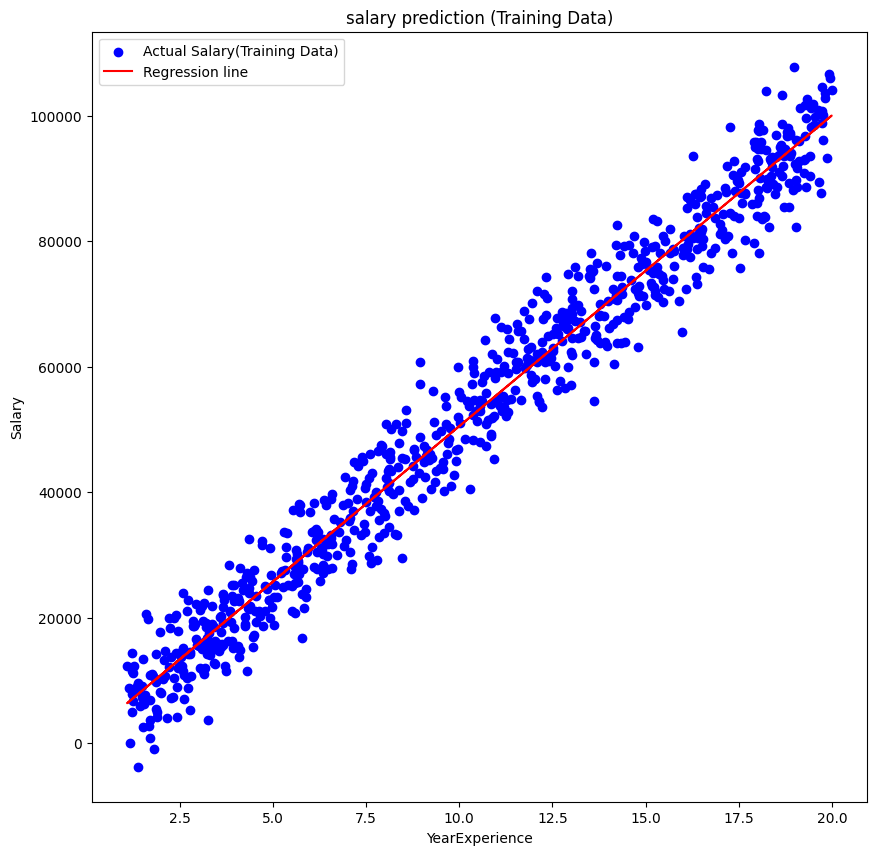

In [16]:
plt.figure(figsize=(10,10))
plt.scatter(x_train,y_train,color="blue",label="Actual Salary(Training Data)")
plt.plot(x_train,model.predict(x_train),color="red",label="Regression line")
plt.xlabel("YearExperience")
plt.ylabel("Salary")
plt.title("salary prediction (Training Data)")
plt.legend()
plt.show()

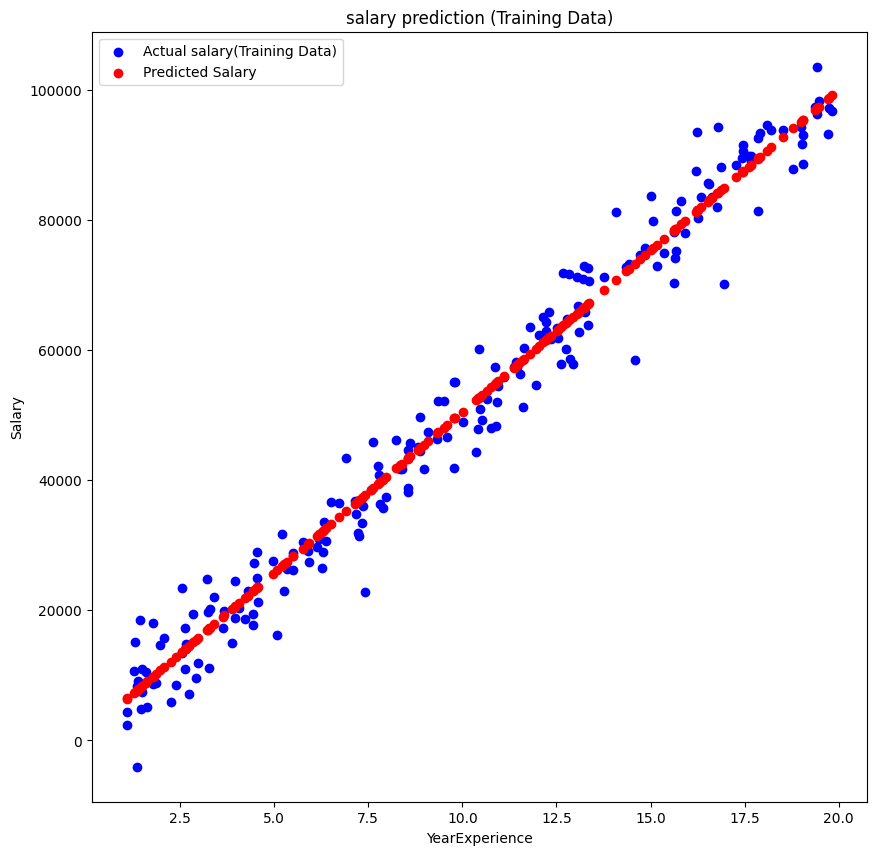

In [20]:
plt.figure(figsize=(10,10))
plt.scatter(x_test,y_test,color="blue",label="Actual salary(Training Data)")
plt.scatter(x_test,y_pred,color="red",label="Predicted Salary")
plt.xlabel("YearExperience")
plt.ylabel("Salary")
plt.title("salary prediction (Training Data)")
plt.legend()
plt.show()

In [18]:
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(f"Mean Absolute Error:{mae}")
print(f"Mean Squared Error:{mse}")
print(f"R2 Score:{r2}")

Mean Absolute Error:3602.3955438952066
Mean Squared Error:21434311.66454385
R2 Score:0.9720753738957405


In [38]:
experience=float(input("Enter Years of Experience"))
predicted_salary=model.predict([[experience]])[0]
predicted_salary = predicted_salary.item()

print(f"Predicted Salary for {experience} years of experience:{predicted_salary:.2f}")

Enter Years of Experience3.0
Predicted Salary for 3.0 years of experience:15856.71


In [ ]:

This linear regression model predicts salary based on years of experience.  The model demonstrates a strong correlation between these two variables, as evidenced by the R² score (which you should include in your conclusion - it's calculated but not printed in the provided text output).  A high R² indicates a good fit, meaning the model can explain a significant portion of the variance in salaries.

For HR managers, this model offers several practical applications:

* **Salary Benchmarking:** The model can help establish a competitive salary range for new hires based on their years of experience.  It provides a data-driven estimate, reducing bias and ensuring fairness in compensation decisions.

* **Internal Equity Analysis:**  The model can identify potential salary discrepancies among current employees with similar experience levels. This helps ensure internal pay equity and may reveal opportunities for adjustments or promotions.

* **Budgeting and Forecasting:** The model provides a basis for forecasting salary expenses based on anticipated hiring and employee experience growth.  This allows for more accurate budget planning and resource allocation.

* **Performance Evaluation:** While not a direct measure of performance, the model can provide a baseline for evaluating salary increases aligned with experience growth, making performance-based raises more transparent and data-justified.


**Important Considerations for HR Managers:**

* **Model Limitations:**  This model is based solely on years of experience.  Other crucial factors like skills, education, job title, location, and performance should be considered alongside the model's prediction.  The model should not be used as the sole determinant of salary decisions.

* **Data Updates:**  The model's accuracy relies on the underlying data. Periodically retrain the model with updated salary data to maintain its relevance and accuracy as market conditions change.

* **Regular Evaluation:** Continuously evaluate the model's performance using appropriate metrics (R², MAE, MSE) and consider refining it to incorporate additional relevant variables.

In summary, the linear regression model provides a valuable tool for HR managers to support data-informed decisions regarding salary and compensation. However, it is essential to use it in conjunction with professional judgment and consider other critical factors to ensure fair and competitive compensation practices.
